In [1]:
import cv2
import sys
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# init cascades
face_cascade_path = '/home/jarmentr/opencv-3.1.0/data/haarcascades/haarcascade_frontalface_default.xml'
eye_cascade_path = '/home/jarmentr/opencv-3.1.0/data/haarcascades/haarcascade_eye.xml'

face_data_path = '/home/jarmentr/.local/bin/MinecraftObjectRecognition/data/faces'

In [3]:
faceCascade = cv2.CascadeClassifier(face_cascade_path)
eyeCascade = cv2.CascadeClassifier(eye_cascade_path)

38 26 784 784


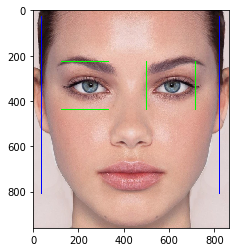

117 147 382 382


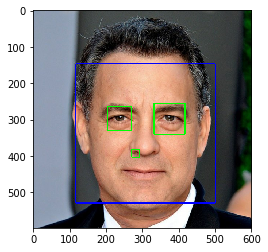

25 81 123 123


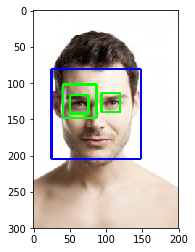

In [10]:
for path in os.listdir(face_data_path):
    # grayscale video capture
    img = cv2.imread(os.path.join(face_data_path, path))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # detect faces
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30,30)
    )

    # draw bounding boxes of faces on frame
    for (x,y,w,h) in faces:
        box = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyeCascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
        
        # show image with drawn bounding boxes
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()